In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
from sklearn import preprocessing

### First we need to load the database

In [13]:
df2018 = pd.read_csv('ks-projects-201801.csv')

In [14]:
df2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [15]:
df2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


As discussed in the report, dropping features considered to be not useful to the implementation as we want.

In [16]:
df2018.drop(['ID', 'name', 'pledged', 'usd pledged', 'goal', 'category', 'backers'], axis=1, inplace=True)
df2018.shape

(378661, 8)

Checking if the columns were dropped correctly.

In [17]:
df2018.head()

,main_category,currency,deadline,launched,state,country,usd_pledged_real,usd_goal_real
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,0.0,1533.95
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,2421.0,30000.00
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,220.0,45000.00
3,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,1.0,5000.00
4,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,US,1283.0,19500.00


#### Checking how many states value our class label has

In [18]:
df2018.state.nunique()

6

#### Checking the values and their counts

In [19]:
df2018.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [20]:
i = 0
states = ['failed', 'successful', 'canceled', 'undefined', 'live', 'suspended']
for count in df2018.state.value_counts():
    percentual_sucess = round((float(count) / len(df2018.state)) * 100,2)
    print("%s: %s%%" % (states[i], percentual_sucess))
    i = i + 1

failed: 52.22%
successful: 35.38%
canceled: 10.24%
undefined: 0.94%
live: 0.74%
suspended: 0.49%


#### Removing not used state values

In [21]:
flt_list = ['failed', 'successful', 'canceled', 'suspended']
df2018 = df2018[df2018.state.isin(flt_list)]
df2018.state.value_counts()

failed        197719
successful    133956
canceled       38779
suspended       1846
Name: state, dtype: int64

### Checking proportion of each possible value for our label class.

In [22]:
i = 0
states = ['failed', 'successful', 'canceled', 'suspended']
for count in df2018.state.value_counts():
    percentual_sucess = round((float(count) / len(df2018.state)) * 100,2)
    print("%s: %s%%" % (states[i], percentual_sucess))
    i = i + 1

failed: 53.11%
successful: 35.98%
canceled: 10.42%
suspended: 0.5%


### Changing the dates for the time period that the project was live on the platform

In [23]:
label_column = 'state'
time_column = 'time_elapsed'

df2018['launched'] = pd.to_datetime(df2018['launched'])
df2018['deadline'] = pd.to_datetime(df2018['deadline'])
df2018[time_column] = (df2018.deadline - df2018.launched).astype('timedelta64[h]')

df2018.drop(['launched', 'deadline'], axis=1, inplace=True)

In [24]:
def showCorr(df):
    corr = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, cbar=None, annot=True, cmap='Blues')
    plt.show()

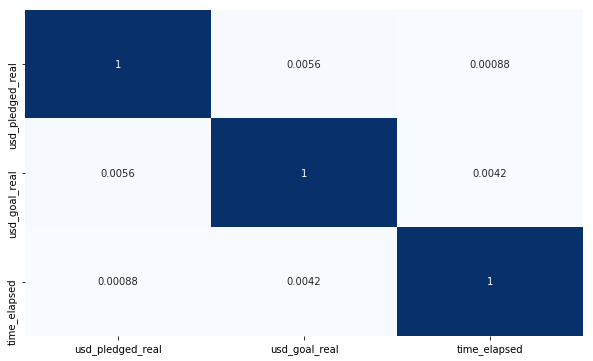

In [25]:
showCorr(df2018)

##### This copy was created just to make tests without altering the original dataset

In [26]:
df2018_copy = df2018.copy()
df2018_copy.head()

,main_category,currency,state,country,usd_pledged_real,usd_goal_real,time_elapsed
0,Publishing,GBP,failed,GB,0.0,1533.95,1403.0
1,Film & Video,USD,failed,US,2421.0,30000.00,1435.0
2,Film & Video,USD,failed,US,220.0,45000.00,1079.0
3,Music,USD,failed,US,1.0,5000.00,716.0
4,Film & Video,USD,canceled,US,1283.0,19500.00,1335.0


In [27]:
columns = ['main_category','currency', 'country']

#### Checking correlation between features

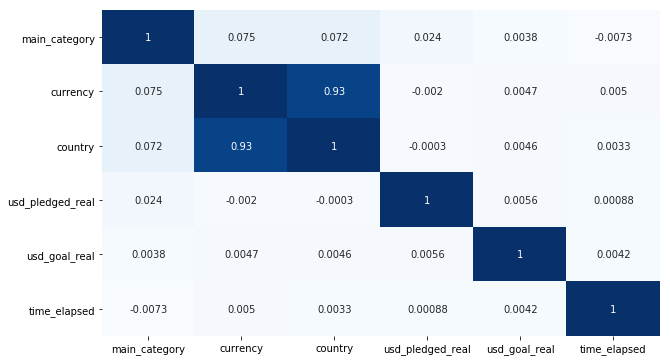

In [28]:
df2018_copy[columns] = df2018_copy[columns].apply(lambda x: pd.factorize(x)[0])
showCorr(df2018_copy)

In [29]:
df2018.head()

,main_category,currency,state,country,usd_pledged_real,usd_goal_real,time_elapsed
0,Publishing,GBP,failed,GB,0.0,1533.95,1403.0
1,Film & Video,USD,failed,US,2421.0,30000.00,1435.0
2,Film & Video,USD,failed,US,220.0,45000.00,1079.0
3,Music,USD,failed,US,1.0,5000.00,716.0
4,Film & Video,USD,canceled,US,1283.0,19500.00,1335.0


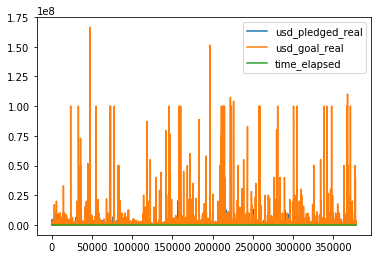

In [30]:
df2018.plot()
plt.show()

#### Converting categorical variable into dummy/indicator variables

In [31]:
def getDummies(df):
    return pd.get_dummies(df)

In [32]:
dummies = getDummies(df2018[columns])
dummies.head()

,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df2018.drop(columns, axis=1, inplace=True)

In [34]:
df2018 = pd.concat([df2018,dummies], axis=1)
df2018.shape

(372300, 56)

In [35]:
df2018.dropna(inplace=True)

In [36]:
y_target = df2018[label_column]
df2018 = df2018.drop([label_column], axis=1)

In [37]:
df2018.head()

,usd_pledged_real,usd_goal_real,time_elapsed,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,1533.95,1403.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2421.0,30000.00,1435.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,220.0,45000.00,1079.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.0,5000.00,716.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1283.0,19500.00,1335.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
def normalizeDF(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=df.columns)
    return df

In [39]:
df2018_norm = normalizeDF(df2018)
df2018_norm.head()

,usd_pledged_real,usd_goal_real,time_elapsed,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.000000e+00,0.000009,0.003492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.190325e-04,0.000180,0.003572,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.081666e-05,0.000270,0.002686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.916666e-08,0.000030,0.001782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6.308082e-05,0.000117,0.003323,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
df2018_copy.drop(['state'], axis=1, inplace=True)

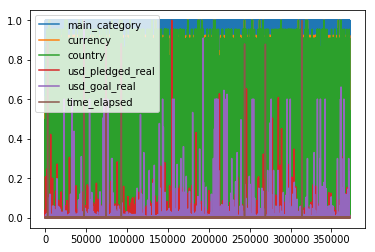

In [41]:
df2018_cp_norm = normalizeDF(df2018_copy)
df2018_cp_norm.plot()
plt.show()

In [42]:
def showPairPlot(df):
    sns.pairplot(df)
    plt.show()

#### Since the number of features increased to over 50, I tried to apply the PCA to see if we could have a dimentionality reduction

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(df2018)
X=scaler.transform(df2018)    

pca = PCA()
x_new = pca.fit_transform(X)

/home/viniciusaraujo/.local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:28: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._online_lda import (mean_change, _dirichlet_expectation_1d,


In [44]:
x_new

array([[ 3.71316171e+00, -3.65562990e+00,  1.43562831e-01, ...,
        -1.15996226e-14, -1.05743488e-14, -1.95735806e-15],
       [-1.10225148e+00, -1.81682926e-01,  4.74153542e-02, ...,
        -1.54078972e-15, -6.07181588e-16,  4.80452167e-16],
       [-1.10078272e+00, -1.84250926e-01,  4.80760350e-02, ...,
        -6.68274593e-15,  3.47992489e-16,  1.68235588e-15],
       ...,
       [-1.10085673e+00, -1.84373754e-01,  4.82518154e-02, ...,
        -5.20452016e-19,  2.90614314e-18,  7.44443432e-19],
       [-7.74167320e-01,  2.90634462e-01, -1.89753893e-01, ...,
         4.90187961e-18,  6.53801563e-18,  2.71460739e-18],
       [-1.01879982e+00, -7.08951497e-02,  2.67225966e-02, ...,
        -2.22688981e-17, -6.80235370e-18,  3.78063158e-18]])

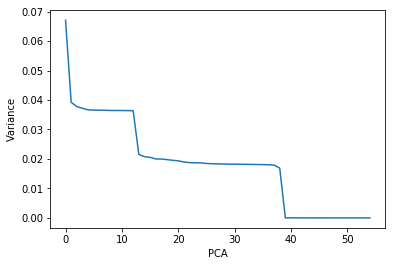

In [48]:
pca_variance = pca.explained_variance_ratio_
plt.plot(pca_variance)
plt.ylabel('Variance')
plt.xlabel('PCA')
plt.show()

In [50]:
sum(pca_variance[0:39])

0.99990689643806208

In [51]:
pca = PCA(n_components=39)
x_new = pca.fit_transform(X)

In [52]:
x_new

array([[  3.71316171e+00,  -3.65562990e+00,   1.43562831e-01, ...,
         -1.08324700e-01,  -3.61931894e-02,   3.37657707e-01],
       [ -1.10225148e+00,  -1.81682926e-01,   4.74153542e-02, ...,
         -2.40970154e-01,   1.12719479e-01,   9.32268617e-02],
       [ -1.10078272e+00,  -1.84250926e-01,   4.80760350e-02, ...,
         -1.99405739e-01,   7.03761920e-03,   8.14941753e-02],
       ..., 
       [ -1.10085673e+00,  -1.84373754e-01,   4.82518154e-02, ...,
         -2.21454578e-01,   1.36327447e-02,   7.90919378e-02],
       [ -7.74167320e-01,   2.90634462e-01,  -1.89753893e-01, ...,
         -3.21130536e-01,  -2.32574829e-03,  -1.21639391e+00],
       [ -1.01879982e+00,  -7.08951497e-02,   2.67225966e-02, ...,
         -3.96563210e-02,   2.47105101e-01,   2.60771364e-01]])

In [53]:
nDF2018 = pd.DataFrame(np.round(x_new, 4))
nDF2018.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,3.7132,-3.6556,0.1436,-0.2064,-0.3536,0.0742,0.0281,0.0054,0.0164,-0.0466,...,0.0759,-0.0404,0.1709,0.0214,0.3086,0.0185,0.2792,-0.1083,-0.0362,0.3377
1,-1.1023,-0.1817,0.0474,0.0245,-0.0016,-0.0511,-0.0194,0.0100,0.0114,-0.0023,...,-0.0665,-0.0246,0.0659,0.0617,0.1097,0.0133,0.1051,-0.2410,0.1127,0.0932
2,-1.1008,-0.1843,0.0481,0.0249,-0.0027,-0.0523,-0.0178,0.0114,0.0073,-0.0009,...,-0.0786,-0.0131,0.0221,0.0246,0.0131,-0.0361,-0.0212,-0.1994,0.0070,0.0815
3,-1.1877,-0.0447,0.0196,-0.0294,0.0167,-0.0407,0.0044,-0.0147,0.0142,0.0194,...,-0.0037,-0.0049,-0.0177,0.0502,0.0632,0.1145,0.1137,-0.1155,-0.7252,0.3492
4,-1.1018,-0.1825,0.0477,0.0246,-0.0018,-0.0515,-0.0190,0.0105,0.0101,-0.0018,...,-0.0730,-0.0208,0.0535,0.0515,0.0830,-0.0004,0.0664,-0.2398,0.0848,0.0853


In [54]:
X = np.array(df2018)
y = y_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)

In [55]:
from sklearn.metrics import f1_score

def performance_metric(y_true, y_predict):
    return f1_score(y_true, y_predict, average='micro')  

In [56]:
def clf_score(clf, X_train, X_test, y_train, y_test):
    print "Starting..."
    clf.fit(X_train, y_train)
    print "Finished!"
    return performance_metric(clf.predict(X_test), y_test)

#### Making a different function so we could test the PCA and the normalized distributions

In [57]:
def clf_score_2(df, y_target, clf):
    X = np.array(df2018)
    y = y_target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)
    print "Starting..."
    clf.fit(X_train, y_train)
    print "Finished!"
    return clf.score(X_test, y_test)

### Start testing for default parameters on the models

In [58]:
score = clf_score(sk.LogisticRegression(), X_train, X_test, y_train, y_test)
score

Starting...
Finished!


0.84867042707493956

In [59]:
score_norm = clf_score_2(df2018_norm, y_target, sk.LogisticRegression())
score_norm

Starting...
Finished!


0.84867042707493956

In [60]:
score_pca = clf_score_2(nDF2018, y_target, sk.LogisticRegression())
score_pca

Starting...
Finished!


0.84861670695675528

In [61]:
from sklearn.neural_network import MLPClassifier

mlp_score = clf_score(MLPClassifier(alpha=1), X_train, X_test, y_train, y_test)
mlp_score

Starting...
Finished!


0.88174858984689763

In [62]:
mlp_score_norm = clf_score_2(df2018_norm, y_target, MLPClassifier(alpha=1))
mlp_score_norm

Starting...
Finished!


0.88557614826752618

In [63]:
mlp_score_pca = clf_score_2(nDF2018, y_target, MLPClassifier(alpha=1))
mlp_score_pca

Starting...
Finished!


0.88697287134031699

In [64]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_score = clf_score(GaussianNB(), X_train, X_test, y_train, y_test)
naive_bayes_score

Starting...
Finished!


0.47250872951920492

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_score = clf_score(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)
knn_score

Starting...
Finished!


0.87369057211925871

### Defining functions to use GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def gridSearch(df, target, clf, parameters, scoring_func):
    sc_fnc = make_scorer(scoring_func)
    gs = GridSearchCV(clf, parameters, scoring=sc_fnc, cv=10)
    gs.fit(df, target)
    return gs.best_estimator_

In [67]:
y_target.head()

0      failed
1      failed
2      failed
3      failed
4    canceled
Name: state, dtype: object

In [68]:
df = pd.DataFrame(data = {'targ': y_target})
df = df.apply(lambda x: pd.factorize(x)[0])
y_targ = df['targ']
y_targ.head()

0    0
1    0
2    0
3    0
4    1
Name: targ, dtype: int64

## Start finding the best models for the passed parameters

In [69]:
knn_param = {'n_neighbors' : [3,5,7], 'weights' : ['uniform','distance']}
knn_model = gridSearch(df2018, y_targ, KNeighborsClassifier(), knn_param, performance_metric)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [70]:
knn_model_score = clf_score(knn_model, X_train, X_test, y_train, y_test)
knn_model_score

Starting...
Finished!


0.88176201987644376

In [72]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'sag'] }
model = gridSearch(df2018, y_targ, sk.LogisticRegression(), param_grid, performance_metric)
model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
model_score = clf_score(model, X_train, X_test, y_train, y_test)
model_score

Starting...
Finished!


0.88682514101531018

In [75]:
mlp_param_grid = {'solver': ['sgd', 'adam'], 'alpha': [0.001, 0.01, 1], 'learning_rate': ['constant', 'adaptive'] }
mlp_model = gridSearch(df2018, y_targ, MLPClassifier(), mlp_param_grid, performance_metric)

/Users/Vinicius/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [76]:
mlp_model

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [77]:
mlp_model_score = clf_score(mlp_model, X_train, X_test, y_train, y_test)
mlp_model_score

Starting...
Finished!


0.87998925597636324

In [78]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(random_state=37)
dTree_score = clf_score(dTree, X_train, X_test, y_train, y_test)
dTree_score

Starting...
Finished!


0.81775449905989794

In [79]:
tree_params = { 'criterion' : ['gini', 'entropy'], 'max_depth' : [7, 8, 9, 10], 'class_weight' : [None, 'balanced']}
dTree_model = gridSearch(df2018, y_targ, dTree, tree_params, performance_metric)
dTree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [80]:
dTree_score_2 = clf_score(dTree_model, X_train, X_test, y_train, y_test)
dTree_score_2

Starting...
Finished!


0.88897394574268063

In [81]:
y_test.head()

131837        failed
327458        failed
266885    successful
233208    successful
188608        failed
Name: state, dtype: object

In [82]:
y_pred = knn_model.predict(X_test)
y_pred

array(['failed', 'failed', 'successful', ..., 'canceled', 'failed',
       'successful'], dtype=object)

### Defining function needed to plot the confusion matrix.

It was acquired in the scikit-learn website as shown in the comment below

In [83]:
# From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
import itertools
from sklearn.metrics import confusion_matrix
def conf_matrix(model, X_test, y_test):
#     class_names = [0, 1, 2, 3]
    class_names = ['failed', 'successful', 'canceled', 'suspended']
    y_pred = model.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()

Confusion matrix, without normalization
[[  249  7299   166     0]
 [  881 38665    53     0]
 [    6    15 26742     0]
 [   10   309    65     0]]


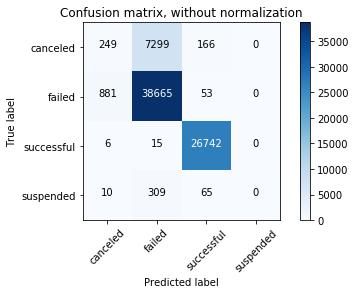

In [85]:
import itertools
from sklearn.metrics import confusion_matrix
# class_names = [0, 1, 2, 3]
class_names = ['canceled', 'failed', 'successful', 'suspended']
y_pred = knn_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [87]:
dTree_model_str_classes = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')
scr = clf_score(dTree_model_str_classes, X_train, X_test, y_train, y_test)
scr

Starting...
Finished!


0.88930969648133229

# Confusion Matrix

In [94]:
dTree_model_str_classes.fit(X_train, y_train)
# conf_matrix(dTree_model_str_classes, X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [95]:
performance_metric(y_test, dTree_model_str_classes.predict(X_test))

0.88930969648133229

A retest on the MLP to check if it I was missing something

In [90]:
new_mlp_model = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
new_mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [92]:
performance_metric(y_test, new_mlp_model.predict(X_test))

0.88258125167875368